In [76]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import operator

In [77]:
df = pd.read_csv('auto-mpg.csv')
df = df.drop('origin', axis=1) #axis 0 for rows and 1 for columns

training, test = train_test_split(df, test_size=0.2, random_state=2022)

polynomial_features= PolynomialFeatures(degree=2)
# x_train = np.array(training['weight'])
# x_train = x_train[:, np.newaxis]
x = np.array(df['weight'])
x = x[:,np.newaxis]
y = np.array(df['mpg'])
y = y[:,np.newaxis]

x_poly = polynomial_features.fit_transform(x) 
print(x_poly[0])
print("X_poly shape:",x_poly.shape) # x^0, x1, x1^2 hence shape = 3
# All variations of the polynomials of degree 2 are present. We use fit_transform to fit our x_train into this poly and get the respective numbers
# The x_poly will have x0, x,x2 and fitting and transforming will make it wrt to x_train
x_poly_train, x_poly_test, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=2022)

[1.0000000e+00 3.5040000e+03 1.2278016e+07]
X_poly shape: (392, 3)


(313, 3) (79, 3) (313, 1)
[[ 0.00000000e+00 -1.82939253e-02  1.65306254e-06]]
Training RMSE: 4.168928031643576
Training R2: 0.714365353712208
Testing RMSE: 4.134278329649043
Testing R2: 0.708590375081101


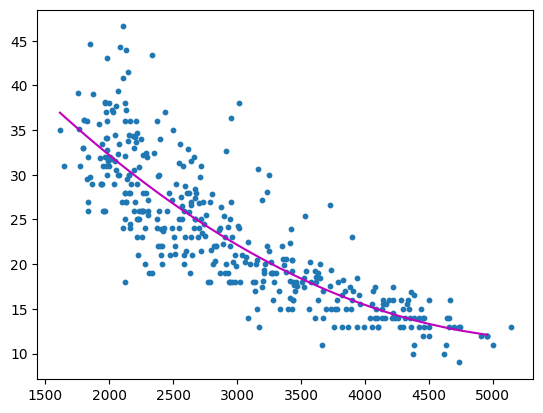

In [78]:
# y_train = y_train[:, np.newaxis]
x_poly_train = np.array(x_poly_train)
x_poly_test = np.array(x_poly_test)
#x_poly_train = x_poly_train[:, np.newaxis]
print(x_poly_train.shape, x_poly_test.shape,y_train.shape)

#nsamples, nx, ny = x_poly_train.shape
#x_poly_train = x_poly_train.reshape((nsamples,nx*ny))
#print(x_poly_train.shape, y_train.shape)
#y_test = test['mpg']
#y_test = y_test[:, np.newaxis]

model = LinearRegression()
model.fit(x_poly_train, y_train)
print(model.coef_)
yhat_train_pred = model.predict(x_poly_train)
# We don't recalculate model.fit as we only need to test it on the testing
#yhat_test_pred = model.predict(x_poly_test) DONE LATER

rmse = np.sqrt(mean_squared_error(y_train,yhat_train_pred))
r2 = r2_score(y_train,yhat_train_pred)
print('Training RMSE: %8.15f' % rmse)
print('Training R2: %8.15f' % r2)

yhat_test_pred =  model.predict(x_poly_test)

rmse = np.sqrt(mean_squared_error(y_test,yhat_test_pred))
r2 = r2_score(y_test,yhat_test_pred)
print('Testing RMSE: %8.15f' % rmse)
print('Testing R2: %8.15f' % r2)

plt.scatter(df['weight'], df['mpg'], s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(training['weight'],yhat_train_pred), key=sort_axis)
x_poly_train, yhat_train_pred = zip(*sorted_zip)
plt.plot(x_poly_train, yhat_train_pred, color='m')
plt.show()